<a href="https://colab.research.google.com/github/DGkurnia/cnkproject/blob/main/BMLP_Derfansyah_Guswiranata_Kurnia_AirBNB_clus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Perkenalan Dataset**


# **Perkenalan Diri**
## Nama : Derfansyah Guswiranata Kurnia
## Identitas dicoding: dgkurnia
## email : weerakurnia@gmail.com
## Domisili : Jakarta Timur

# **1.a. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
#Impor Perpustakaan untuk dataset
import numpy as np
import pandas as pd
#Grafik
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#impor dataset
from google.colab import drive
drive.mount('/content/drive')
#impor untuk preproses data
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
import plotly.io as pio
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

Mounted at /content/drive


In [3]:
#proses inisiasi category_encoders
!pip install category_encoders
from category_encoders import LeaveOneOutEncoder

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 2.0 MB/s eta 0:00:00


In [4]:
#inisiasi 'pelabelan banyak'
from sklearn.preprocessing import MultiLabelBinarizer

Pelabelan banyak berperan sebagai pembagi klasifikasi kamar

In [5]:
#perpustakaan untuk interpolasi
from scipy.interpolate import interp1d

In [23]:
#perpustakaan untuk DBSCAN
from sklearn.cluster import DBSCAN
#perpustakaan pendukung untuk kluster
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
import plotly.io as pio
#ke seksi pembelajaran

In [89]:
#persiapan perpustakaan
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [96]:
#perpustakaan tambahan
from sklearn.metrics import silhouette_score

In [24]:
#seksi sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

In [6]:
#Impor Data
airbnbdf = pd.read_csv('/content/drive/MyDrive/csv-files/airbnb-clean.csv', sep=';') # skip bad lines
#Penyalinan data
airbnbc = airbnbdf.copy()
#info
#airbnbc.info()

### Resume data
####   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
* 0   id                              48907 non-null  int64  
* 1   name                            48891 non-null  object
* 2   host_id                         48891 non-null  float64
* 3   host_name                       48871 non-null  object
* 4   neighbourhood_group             48891 non-null  object
* 5   neighbourhood                   48891 non-null  object
* 6   latitude                        48891 non-null  object
* 7   longitude                       48891 non-null  object
* 8   room_type                       48891 non-null  object
* 9   price                           48891 non-null  float64
* 10  minimum_nights                  48891 non-null  float64
* 11  number_of_reviews               48889 non-null  float64
* 12  last_review                     38840 non-null  object
* 13  reviews_per_month               38841 non-null  float64
* 14  calculated_host_listings_count  48890 non-null  float64
* 15  availability_365                48886 non-null  float64

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [7]:
#identifikasi kolom
airbnbc.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

Total data hilang

In [8]:
#Inspeksi data hilang
airbnbc.isna().sum()

,0
id,0
name,16
host_id,16
host_name,36
neighbourhood_group,16
neighbourhood,16
latitude,16
longitude,16
room_type,16
price,16


# **4. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang perlu dilakukan, namun **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

In [9]:
#Persiapan untuk pembarsihan (pergantian jenis data)
airbnbc[['id','host_id']] = airbnbc[['id','host_id']].astype('str').copy()
airbnbc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48907 entries, 0 to 48906
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48907 non-null  object 
 1   name                            48891 non-null  object 
 2   host_id                         48907 non-null  object 
 3   host_name                       48871 non-null  object 
 4   neighbourhood_group             48891 non-null  object 
 5   neighbourhood                   48891 non-null  object 
 6   latitude                        48891 non-null  object 
 7   longitude                       48891 non-null  object 
 8   room_type                       48891 non-null  object 
 9   price                           48891 non-null  float64
 10  minimum_nights                  48891 non-null  float64
 11  number_of_reviews               48889 non-null  float64
 12  last_review                     

Pengubahan jenis data identitas ('id' dan 'host_id') menjadi string untuk menghindari pemakaian numerik

In [10]:
#pergantian jenis data untuk tanggal dan interpolasi
airbnbc['last_review'] = pd.to_datetime(airbnbc['last_review']).copy()
airbnbc['price'].interpolate(method='nearest')
airbnbc['price'].interpolate(method='linear')
airbnbc['reviews_per_month'].interpolate(method='nearest')
airbnbc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48907 entries, 0 to 48906
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48907 non-null  object        
 1   name                            48891 non-null  object        
 2   host_id                         48907 non-null  object        
 3   host_name                       48871 non-null  object        
 4   neighbourhood_group             48891 non-null  object        
 5   neighbourhood                   48891 non-null  object        
 6   latitude                        48891 non-null  object        
 7   longitude                       48891 non-null  object        
 8   room_type                       48891 non-null  object        
 9   price                           48891 non-null  float64       
 10  minimum_nights                  48891 non-null  float64       
 11  nu

<ipython-input-10-bb164fece7e0>:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  airbnbc['last_review'] = pd.to_datetime(airbnbc['last_review']).copy()


In [12]:
#persiapan untuk pembersihan duplikat
airbnbc.drop_duplicates(inplace=True)
airbnbc.info()
#ke pembersihan kolom

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48907 entries, 0 to 48906
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48907 non-null  object        
 1   name                            48891 non-null  object        
 2   host_id                         48907 non-null  object        
 3   host_name                       48871 non-null  object        
 4   neighbourhood_group             48891 non-null  object        
 5   neighbourhood                   48891 non-null  object        
 6   latitude                        48891 non-null  object        
 7   longitude                       48891 non-null  object        
 8   room_type                       48891 non-null  object        
 9   price                           48891 non-null  float64       
 10  minimum_nights                  48891 non-null  float64       
 11  nu

In [54]:
#pengisian kolom kosong (Pengisian nilai untuk kolom tidak ada di data numerik)
airbnbc[['minimum_nights', 'number_of_reviews','reviews_per_month','calculated_host_listings_count', 'availability_365']] = airbnbc[['minimum_nights', 'number_of_reviews','reviews_per_month','calculated_host_listings_count', 'availability_365']].fillna(0).copy()

# Pengubahan nilai kosong
airbnbc.replace([np.inf, -np.inf], 0, inplace=True)

# Konversi ke kolom angka
airbnbc[['minimum_nights', 'number_of_reviews','reviews_per_month','calculated_host_listings_count', 'availability_365']] = airbnbc[['minimum_nights', 'number_of_reviews','reviews_per_month','calculated_host_listings_count', 'availability_365']].astype('int64').copy()
airbnbc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48907 entries, 0 to 48906
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48907 non-null  object 
 1   name                            48891 non-null  object 
 2   host_id                         48907 non-null  object 
 3   host_name                       48871 non-null  object 
 4   neighbourhood_group             48907 non-null  object 
 5   neighbourhood                   48907 non-null  object 
 6   latitude                        48891 non-null  object 
 7   longitude                       48891 non-null  object 
 8   room_type                       48891 non-null  object 
 9   price                           48891 non-null  float64
 10  minimum_nights                  48907 non-null  int64  
 11  number_of_reviews               48907 non-null  int64  
 12  last_review                     

In [14]:
#Pengisian kolom kosong di jenis data kata
airbnbc['name'].fillna('No Name') #kolom nama kamar
airbnbc['host_name'].fillna('Unidentified') #kolom nama pemilik
airbnbc[['neighbourhood_group', 'neighbourhood']] = airbnbc[['neighbourhood_group', 'neighbourhood']].fillna('Unknown')
airbnbc['room_type'].fillna('Unspecified')
airbnbc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48907 entries, 0 to 48906
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48907 non-null  object        
 1   name                            48891 non-null  object        
 2   host_id                         48907 non-null  object        
 3   host_name                       48871 non-null  object        
 4   neighbourhood_group             48907 non-null  object        
 5   neighbourhood                   48907 non-null  object        
 6   latitude                        48891 non-null  object        
 7   longitude                       48891 non-null  object        
 8   room_type                       48891 non-null  object        
 9   price                           48891 non-null  float64       
 10  minimum_nights                  48907 non-null  int64         
 11  nu

Rincian:
* tanda 'No name' merujuk ke baris tanpa nama unit jelas
* tanda 'Unidentified' merujuk ke baris pemilik yang tak teridentifikasi
* tanda 'Unknown' berarti lokasi unit tidak jelas


In [56]:
#pengisian kolom 'tidak terulas'
airbnbc['last_review'].fillna(0) #tidak diulas
airbnbc['last_review'].head(20)

,last_review
0,2019-06-23 00:00:00
1,2019-06-20 00:00:00
2,0
3,2019-07-04 00:00:00
4,2019-05-22 00:00:00
5,0
6,2019-04-23 00:00:00
7,2019-02-17 00:00:00
8,2019-06-20 00:00:00
9,2018-06-04 00:00:00


# **5. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [57]:
#Inspeksi pemodelan kamar
def countsplot(category):
  # Create count plot with dynamic title
  plt.figure(figsize = (10, 9))
  sns.countplot(data = airbnbc, x = category)
  plt.ylabel("Count")
  plt.title(f"{category} Distribution")
  plt.show()

  # Calculate counts and percentages
  category_counts = airbnbc[category].value_counts() #Nilai perhitungan
  category_percentages = airbnbc[category].value_counts(normalize = True) #Persentase

  # Combine counts and percentages into a DataFrame
  stats_df = pd.DataFrame({"Count": category_counts, "Proportion": category_percentages})
  stats_df["Count"] = stats_df["Count"].apply("{:,}".format)
  stats_df["Proportion"] = stats_df["Proportion"].apply("{:.1%}".format)

  return stats_df

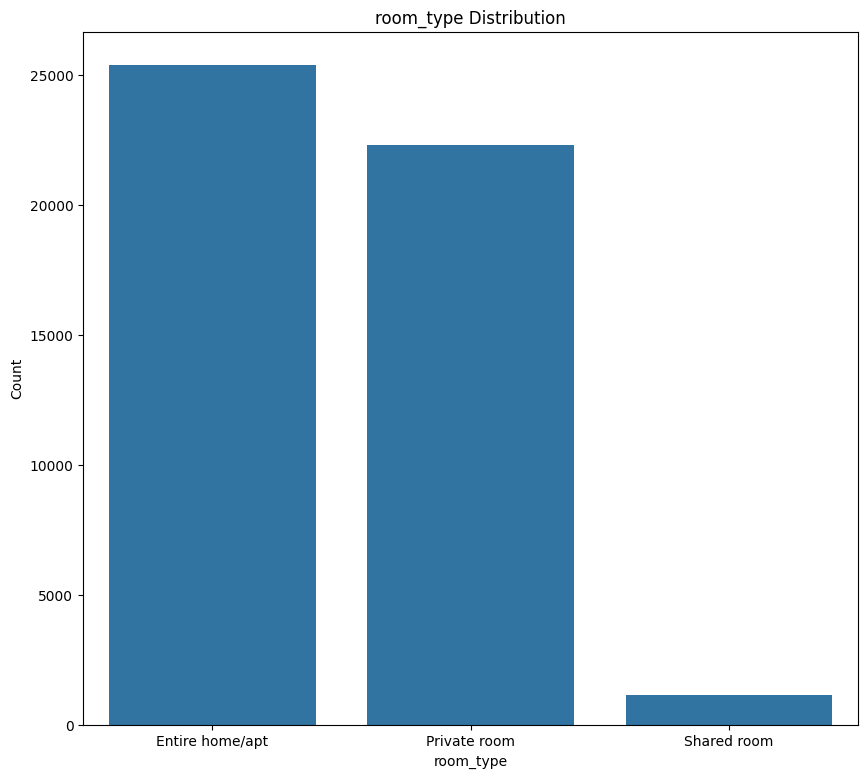

,Count,Proportion
room_type,,
Entire home/apt,"25,408",52.0%
Private room,"22,323",45.7%
Shared room,"1,160",2.4%


In [58]:
#pemeriksaan jenis kamar
countsplot('room_type')

Tipe seluruh rumah dan kamar privat lebih dominan

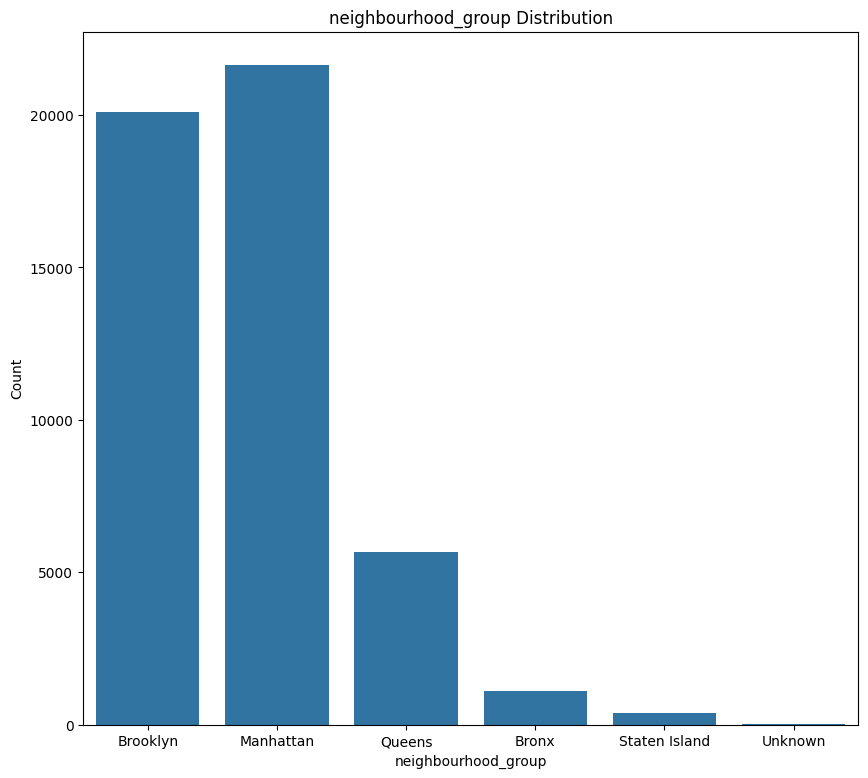

,Count,Proportion
neighbourhood_group,,
Manhattan,"21,659",44.3%
Brooklyn,"20,103",41.1%
Queens,"5,666",11.6%
Bronx,"1,090",2.2%
Staten Island,373,0.8%
Unknown,16,0.0%


In [59]:
#visualisasi hasil (lokasi)
countsplot('neighbourhood_group')

Manhattan lebih banyak dari Brooklyn

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [60]:
#Pemilihan data
funi, pri, sha,*_ = airbnbc['room_type'].unique().copy() #seleksi area
#unit penuh
funidf = airbnbc[airbnbc['room_type'] == funi].copy()
funidf.reset_index(drop=True, inplace=True)
funidfcs = funidf[['room_type','last_review','price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']].copy()
#kamar privat
pridf = airbnbc[airbnbc['room_type'] == pri].copy()
pridf.reset_index(drop=True, inplace=True)
pridfcs = pridf[['room_type','last_review','price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']].copy()
#kamar berbagi
shadf = airbnbc[airbnbc['room_type'] == sha].copy()
shadf.reset_index(drop=True, inplace=True)
shadfcs = shadf[['room_type','last_review','price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']].copy()

In [61]:
#cek kelompok data
funidfcs.info() #info
funidfcs.head(10) #kamar unit penuh

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25408 entries, 0 to 25407
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   room_type                       25408 non-null  object 
 1   last_review                     25408 non-null  object 
 2   price                           25408 non-null  float64
 3   minimum_nights                  25408 non-null  int64  
 4   number_of_reviews               25408 non-null  int64  
 5   reviews_per_month               25408 non-null  int64  
 6   calculated_host_listings_count  25408 non-null  int64  
 7   availability_365                25408 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 1.6+ MB


,room_type,last_review,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Entire home/apt,2019-06-23 00:00:00,298.0,3,16,0,1,4
1,Entire home/apt,2019-04-23 00:00:00,227.0,5,6,95,1,0
2,Entire home/apt,2019-06-20 00:00:00,99.0,1,81,2,1,202
3,Entire home/apt,2018-06-04 00:00:00,95.0,14,5,0,2,0
4,Entire home/apt,2019-07-07 00:00:00,119.0,2,51,2,1,160
5,Entire home/apt,2019-06-17 00:00:00,87.0,3,151,332,1,210
6,Entire home/apt,2019-07-01 00:00:00,300.0,3,108,144,1,318
7,Entire home/apt,2017-08-19 00:00:00,295.0,7,2,3,2,0
8,Entire home/apt,2019-04-25 00:00:00,170.0,3,35,82,2,0
9,Entire home/apt,2016-01-03 00:00:00,85.0,1,1,2,1,0


In [62]:
#kamar satu unit
pridfcs.info()
pridfcs.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22323 entries, 0 to 22322
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   room_type                       22323 non-null  object 
 1   last_review                     22323 non-null  object 
 2   price                           22323 non-null  float64
 3   minimum_nights                  22323 non-null  int64  
 4   number_of_reviews               22323 non-null  int64  
 5   reviews_per_month               22323 non-null  int64  
 6   calculated_host_listings_count  22323 non-null  int64  
 7   availability_365                22323 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 1.4+ MB


,room_type,last_review,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Private room,2019-06-20 00:00:00,55.0,7,3,2,2,182
1,Private room,0,130.0,2,0,0,2,177
2,Private room,2019-07-04 00:00:00,116.0,1,95,6,6,280
3,Private room,0,100.0,2,0,1,99,0
4,Private room,2019-02-17 00:00:00,45.0,1,2,0,1,0
5,Private room,0,78.0,3,0,0,1,322
6,Private room,2019-06-23 00:00:00,65.0,1,0,2,1,364
7,Private room,2016-11-26 00:00:00,75.0,2,2,5,1,0
8,Private room,0,88.0,5,0,0,1,0
9,Private room,2017-02-01 00:00:00,40.0,6,5,12,1,0


In [63]:
#kamar berbagi
shadfcs.info()
shadfcs.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1160 entries, 0 to 1159
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   room_type                       1160 non-null   object 
 1   last_review                     1160 non-null   object 
 2   price                           1160 non-null   float64
 3   minimum_nights                  1160 non-null   int64  
 4   number_of_reviews               1160 non-null   int64  
 5   reviews_per_month               1160 non-null   int64  
 6   calculated_host_listings_count  1160 non-null   int64  
 7   availability_365                1160 non-null   int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 72.6+ KB


,room_type,last_review,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Shared room,2019-05-22 00:00:00,150.0,3,17,117,1,14
1,Shared room,2019-06-22 00:00:00,26.0,1,15,68,4,365
2,Shared room,2019-04-06 00:00:00,75.0,1,2,19,1,318
3,Shared room,0,25.0,10,0,0,1,0
4,Shared room,2016-12-27 00:00:00,70.0,1,4,9,1,0
5,Shared room,2019-05-26 00:00:00,65.0,7,131,131,2,0
6,Shared room,0,60.0,1,0,0,1,0
7,Shared room,2015-12-24 00:00:00,65.0,1,1,2,1,0
8,Shared room,2019-07-08 00:00:00,35.0,1,104,245,5,352
9,Shared room,2017-01-04 00:00:00,85.0,2,2,5,3,0


# Penyatuan kluster untuk analisis
## 1. Unit yang sudah diulas
## 2. Unit yang belum diulas

In [86]:
#Persiapan data untuk disatukan
merdf = pd.concat([funidfcs, pridfcs, shadfcs], ignore_index=True)
#pemisahan menjadi dua bedasarkan tanggal diulas
rclus = merdf[merdf['last_review'] != 0].copy() #sudah diulas
#belum diulas
unrclus = merdf[merdf['last_review'] == 0].copy() #belum diulas

In [87]:
#Inepeksi data (sudah terulas)
rclus.info()
rclus.head(10)

<class 'pandas.core.frame.DataFrame'>
Index: 38840 entries, 0 to 48890
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   room_type                       38840 non-null  object 
 1   last_review                     38840 non-null  object 
 2   price                           38840 non-null  float64
 3   minimum_nights                  38840 non-null  int64  
 4   number_of_reviews               38840 non-null  int64  
 5   reviews_per_month               38840 non-null  int64  
 6   calculated_host_listings_count  38840 non-null  int64  
 7   availability_365                38840 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.7+ MB


,room_type,last_review,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Entire home/apt,2019-06-23 00:00:00,298.0,3,16,0,1,4
1,Entire home/apt,2019-04-23 00:00:00,227.0,5,6,95,1,0
2,Entire home/apt,2019-06-20 00:00:00,99.0,1,81,2,1,202
3,Entire home/apt,2018-06-04 00:00:00,95.0,14,5,0,2,0
4,Entire home/apt,2019-07-07 00:00:00,119.0,2,51,2,1,160
5,Entire home/apt,2019-06-17 00:00:00,87.0,3,151,332,1,210
6,Entire home/apt,2019-07-01 00:00:00,300.0,3,108,144,1,318
7,Entire home/apt,2017-08-19 00:00:00,295.0,7,2,3,2,0
8,Entire home/apt,2019-04-25 00:00:00,170.0,3,35,82,2,0
9,Entire home/apt,2016-01-03 00:00:00,85.0,1,1,2,1,0


In [88]:
#kolom belum diulas
unrclus.info()
unrclus.head(10)

<class 'pandas.core.frame.DataFrame'>
Index: 10051 entries, 13 to 48888
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   room_type                       10051 non-null  object 
 1   last_review                     10051 non-null  object 
 2   price                           10051 non-null  float64
 3   minimum_nights                  10051 non-null  int64  
 4   number_of_reviews               10051 non-null  int64  
 5   reviews_per_month               10051 non-null  int64  
 6   calculated_host_listings_count  10051 non-null  int64  
 7   availability_365                10051 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 706.7+ KB


,room_type,last_review,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
13,Entire home/apt,0,154.0,5,0,0,1,0
22,Entire home/apt,0,120.0,1,0,0,1,0
23,Entire home/apt,0,500.0,7,0,0,1,365
24,Entire home/apt,0,150.0,7,0,0,1,0
29,Entire home/apt,0,199.0,10,0,0,1,0
30,Entire home/apt,0,100.0,1,0,0,1,0
32,Entire home/apt,0,115.0,1,0,0,1,0
33,Entire home/apt,0,250.0,2,0,0,2,0
37,Entire home/apt,0,250.0,1,0,0,1,0
38,Entire home/apt,0,139.0,7,0,0,1,0


## Konsep dari pembagian kluster
#### Ada tiga jenis kluster
#### a. kamar seluruh unit
#### b. kamar privat satu unit
#### c. kamar berbagi
Hal lain yang diperhatikan adalah ulasan

In [90]:
#persiapan multi label untuk jenis kamar
mlb = MultiLabelBinarizer()
revclus = mlb.fit_transform(rclus['room_type']).copy() #sudah diulas
unrevclus = mlb.fit_transform(unrclus['room_type']).copy() #belum diulas

In [91]:
#standardisasi dan normalisasi nilai numerik (persiapan)
scaler = StandardScaler()
rclus_scaled = scaler.fit_transform(rclus[['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']]).copy()
unrclus_scaled = scaler.fit_transform(unrclus[['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']]).copy()

In [93]:
#Persiapan untuk jenis data saat penyatuan
merrecldf = pd.concat([pd.DataFrame(revclus, columns=mlb.classes_),
                       pd.DataFrame(rclus_scaled, columns=['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365'])], axis=1).copy()
#sudah diulas
unmerrecldf = pd.concat([pd.DataFrame(unrevclus, columns=mlb.classes_),
                       pd.DataFrame(unrclus_scaled, columns=['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365'])], axis=1).copy()
#belum diulas

In [94]:
#pemriksaan dataset (sudah diulas)
merrecldf.info()
merrecldf.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38840 entries, 0 to 38839
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0                                   38840 non-null  int64  
 1   /                               38840 non-null  int64  
 2   E                               38840 non-null  int64  
 3   P                               38840 non-null  int64  
 4   S                               38840 non-null  int64  
 5   a                               38840 non-null  int64  
 6   d                               38840 non-null  int64  
 7   e                               38840 non-null  int64  
 8   h                               38840 non-null  int64  
 9   i                               38840 non-null  int64  
 10  m                               38840 non-null  int64  
 11  n                               38840 non-null  int64  
 12  o                               

,,/,E,P,S,a,d,e,h,i,...,p,r,t,v,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,1,1,1,0,0,1,0,1,1,1,...,1,1,1,0,0.790458,-0.164992,-0.275964,-0.775423,-0.158376,-0.855873
1,1,1,1,0,0,1,0,1,1,1,...,1,1,1,0,0.429960,-0.049951,-0.483487,-0.205912,-0.158376,-0.886751
2,1,1,1,0,0,1,0,1,1,1,...,1,1,1,0,-0.219951,-0.280032,1.072935,-0.763433,-0.158376,0.672586
3,1,1,1,0,0,1,0,1,1,1,...,1,1,1,0,-0.240261,0.467731,-0.504240,-0.775423,-0.120348,-0.886751
4,1,1,1,0,0,1,0,1,1,1,...,1,1,1,0,-0.118403,-0.222512,0.450366,-0.763433,-0.158376,0.348367
5,1,1,1,0,0,1,0,1,1,1,...,1,1,1,0,-0.280881,-0.164992,2.525596,1.214869,-0.158376,0.734342
6,1,1,1,0,0,1,0,1,1,1,...,1,1,1,0,0.800613,-0.164992,1.633247,0.087836,-0.158376,1.568047
7,1,1,1,0,0,1,0,1,1,1,...,1,1,1,0,0.775225,0.065089,-0.566497,-0.757438,-0.120348,-0.886751
8,1,1,1,0,0,1,0,1,1,1,...,1,1,1,0,0.140546,-0.164992,0.118329,-0.283845,-0.120348,-0.886751
9,1,1,1,0,0,1,0,1,1,1,...,1,1,1,0,-0.291035,-0.280032,-0.587249,-0.763433,-0.158376,-0.886751


In [95]:
#belum diulas
unmerrecldf.info()
unmerrecldf.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10051 entries, 0 to 10050
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0                                   10051 non-null  int64  
 1   /                               10051 non-null  int64  
 2   E                               10051 non-null  int64  
 3   P                               10051 non-null  int64  
 4   S                               10051 non-null  int64  
 5   a                               10051 non-null  int64  
 6   d                               10051 non-null  int64  
 7   e                               10051 non-null  int64  
 8   h                               10051 non-null  int64  
 9   i                               10051 non-null  int64  
 10  m                               10051 non-null  int64  
 11  n                               10051 non-null  int64  
 12  o                               

,,/,E,P,S,a,d,e,h,i,...,p,r,t,v,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,1,1,1,0,0,1,0,1,1,1,...,1,1,1,0,-0.108555,-0.223257,0.0,-0.009975,-0.274050,-0.752272
1,1,1,1,0,0,1,0,1,1,1,...,1,1,1,0,-0.203355,-0.360207,0.0,-0.009975,-0.274050,-0.752272
2,1,1,1,0,0,1,0,1,1,1,...,1,1,1,0,0.856173,-0.154782,0.0,-0.009975,-0.274050,1.872495
3,1,1,1,0,0,1,0,1,1,1,...,1,1,1,0,-0.119708,-0.154782,0.0,-0.009975,-0.274050,-0.752272
4,1,1,1,0,0,1,0,1,1,1,...,1,1,1,0,0.016916,-0.052070,0.0,-0.009975,-0.274050,-0.752272
5,1,1,1,0,0,1,0,1,1,1,...,1,1,1,0,-0.259119,-0.360207,0.0,-0.009975,-0.274050,-0.752272
6,1,1,1,0,0,1,0,1,1,1,...,1,1,1,0,-0.217296,-0.360207,0.0,-0.009975,-0.274050,-0.752272
7,1,1,1,0,0,1,0,1,1,1,...,1,1,1,0,0.159115,-0.325970,0.0,-0.009975,-0.254197,-0.752272
8,1,1,1,0,0,1,0,1,1,1,...,1,1,1,0,0.159115,-0.360207,0.0,-0.009975,-0.274050,-0.752272
9,1,1,1,0,0,1,0,1,1,1,...,1,1,1,0,-0.150378,-0.154782,0.0,-0.009975,-0.274050,-0.752272


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [100]:
#konsep fungsi (sampai ke cluster)
def dynamic_min_samples(data):
    # Simple heuristic: number of samples divided by a constant
    return max(2, len(data) // 50)  # At least 2 samples

def dynamic_eps_range(data):
    return (0.1, min(1.0, len(data) // 50 * 0.1))  # Dynamic max based on number of samples.

def plot_silhouette_scores(eps_values, silhouette_scores, min_silhouette_score):
    plt.figure(figsize=(10, 5))
    plt.plot(eps_values, silhouette_scores, marker='o')
    plt.axhline(y=min_silhouette_score, color='r', linestyle='--', label='Min Silhouette Score (0.55)')
    plt.title('Silhouette Scores for Different Epsilon Values')
    plt.xlabel('Epsilon (eps)')
    plt.ylabel('Silhouette Score')
    plt.legend()
    plt.grid()
    plt.show()

def visualize_clusters(data, best_labels):
    unique_labels = set(best_labels)
    colors = [plt.cm.Spectral(float(i) / len(unique_labels)) for i in range(len(unique_labels))]

    plt.figure(figsize=(10, 7))
    for k, col in zip(unique_labels, colors):
        if k == -1:
            col = 'k'  # Black color for noise points

        class_member_mask = (best_labels == k)
        xy = data[class_member_mask]
        plt.scatter(xy[:, 0], xy[:, 1], s=30, color=col, label=f'Cluster {k}')

    plt.title('DBSCAN Clustering Results')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()
#ke fungsi utama

In [106]:
#fungsi utama
def apply_dbscan_with_visualization(data, step=1e-3, min_silhouette_score=0.55):
    best_labels = None
    best_silhouette_score = -1  # Start with the lowest possible score
    silhouette_scores = []
    eps_values = []

    # Scale the data for better performance
    data_scaled = StandardScaler().fit_transform(data)

    min_samples = dynamic_min_samples(data)
    eps_range = dynamic_eps_range(data)

    # Iterate over the range of epsilon values
    for eps in np.arange(eps_range[0], eps_range[1], step):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(data_scaled)

        # Calculate silhouette score only if there are more than 1 cluster and no noise points
        if len(set(labels)) > 1 and -1 not in set(labels):
            silhouette_avg = silhouette_score(data_scaled, labels)
            silhouette_scores.append(silhouette_avg)
            eps_values.append(eps)

            print(f"Trying eps={eps}: Silhouette Score = {silhouette_avg:.3f}")

            if silhouette_avg >= min_silhouette_score and silhouette_avg > best_silhouette_score:
                best_labels = labels
                best_silhouette_score = silhouette_avg

    if best_labels is None:
        print("No suitable parameters found within the specified range.")
    else:
        print(f"Best Silhouette Score: {best_silhouette_score:.3f}")

    plot_silhouette_scores(eps_values, silhouette_scores, min_silhouette_score)

    if best_labels is not None:
        visualize_clusters(data, best_labels)

    return best_labels, best_silhouette_score

In [ ]:
#Persiapan model kluster (unit sudah diulas)
labels, silhouette_avg = apply_dbscan_with_visualization(merrecldf, step=1e-3, min_silhouette_score=0.55)

In [ ]:
#unit belum diulas
unlabel, unsilhouette_avg = apply_dbscan_with_visualization(unmerrecldf, min_samples=5, step=1e-3, min_silhouette_score=0.55)

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [ ]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [ ]:
#Inspeksi visualisasi fungsi


## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [ ]:
#Type your code here

Tulis hasil interpretasinya di sini.
1. Cluster 1:
2. Cluster 2:
3. Cluster 3:

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.